In [1]:
!pip install emoji
!pip install plotly

     |████████████████████████████████| 51kB 2.7MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49716 sha256=c6689b13bfcb77ea0041bea903482d848219bd6c2addf9a122dc8bca332b38e6
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [2]:
!pip install plotly

In [3]:
!pip install wordcloud

In [4]:
!pip install nltk

In [5]:
import pandas as pd
import re
import emoji
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords

plt.style.use('ggplot')

# Data set Gustavo Alejandro Bacab Ruiz

In [6]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9][0-9]), ([0-9]+):([0-9][0-9]) (am|pm) -'
    result = re.match(pattern, s)
    if result:
        return True
    return False
  
# Finds username of any given format.
def FindAuthor(s):
    patterns = [
        '([\w]+):',                        # First Name
        '([\w]+[\s]+[\w]+):',              # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
        '([\w]+)[\u263a-\U0001f999]+:',    # Name and Emoji              
    ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, s)
    if result:
        return True
    return False
  
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
# Upload your file here
conversationPath = 'WhatsApp Chat with Osita 3.0.txt' # chat file
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'User', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])

In [7]:
df['day'] = df['Date'].dt.strftime('%a')
df['month'] = df['Date'].dt.strftime('%b')
df['year'] = df['Date'].dt.year
df['date'] = df['Date'].apply(lambda x: x.date())

In [8]:
df = df.dropna()

In [9]:
df

,Date,Time,User,Message,day,month,year,date
0,2018-12-25,12:07 pm,ROMEL SOSA,<Media omitted>,Tue,Dec,2018,2018-12-25
1,2018-12-27,8:18 am,Sergio Cuxa,<Media omitted>,Thu,Dec,2018,2018-12-27
2,2018-12-27,8:44 am,Raúl Diaz,Jajajajajajajajaja está caliente,Thu,Dec,2018,2018-12-27
3,2018-12-27,9:56 am,ROMEL SOSA,😂😂😂,Thu,Dec,2018,2018-12-27
4,2018-12-27,2:16 pm,Alan Pat,JAJAJAJA,Thu,Dec,2018,2018-12-27
...,...,...,...,...,...,...,...,...
2957,2020-11-22,6:12 pm,ROMEL SOSA,Ni idea xd,Sun,Nov,2020,2020-11-22
2958,2020-11-22,11:21 pm,Julio Barrarientos Vasco,Puebla en cuartos!!! 🤍💙,Sun,Nov,2020,2020-11-22
2959,2020-11-22,11:21 pm,Sergio Cuxa,el verdadero 5to grande,Sun,Nov,2020,2020-11-22
2960,2020-11-22,11:26 pm,Alan Pat,Nmms,Sun,Nov,2020,2020-11-22


In [11]:
df.User.unique()

array(['ROMEL SOSA', 'Sergio Cuxa', 'Raúl Diaz', 'Alan Pat', 'Mike Vasco',
       'Julio Barrientos', 'GT8i', 'Julio Barrarientos Vasco'],
      dtype=object)

In [12]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)

In [13]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))

In [17]:
# Creates a list of unique Authors
l = messages_df.User.unique()

for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["User"] == l[i]]
    
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
    
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
    
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)

  #media conists of media messages
  media = media_messages_df[media_messages_df['User'] == l[i]].shape[0]
  print('Media Messages Sent', media) 
  print() #it really import change the author for user, focus

Stats of Raúl Diaz -
Messages Sent 388
Words per message 4.043814432989691
Media Messages Sent 10

Stats of ROMEL SOSA -
Messages Sent 511
Words per message 5.295499021526418
Media Messages Sent 54

Stats of Alan Pat -
Messages Sent 658
Words per message 4.148936170212766
Media Messages Sent 43

Stats of Sergio Cuxa -
Messages Sent 591
Words per message 5.3485617597292725
Media Messages Sent 36

Stats of Mike Vasco -
Messages Sent 97
Words per message 6.597938144329897
Media Messages Sent 3

Stats of Julio Barrientos -
Messages Sent 80
Words per message 3.95
Media Messages Sent 7

Stats of GT8i -
Messages Sent 335
Words per message 3.9492537313432834
Media Messages Sent 21

Stats of Julio Barrarientos Vasco -
Messages Sent 121
Words per message 4.7272727272727275
Media Messages Sent 6



Text(0.5, 1.0, 'When the group members are most active')

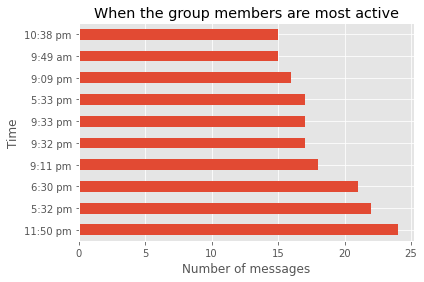

In [18]:
messages_df['Time'].value_counts().head(10).plot.barh() 
plt.xlabel('Number of messages')
plt.ylabel('Time')
plt.title('When the group members are most active')

In [21]:
def dayofweek(i):
  l = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  return l[i];
day_df=pd.DataFrame(messages_df["Message"])
day_df['day_of_date'] = messages_df['Date'].dt.weekday
day_df['day_of_date'] = day_df["day_of_date"].apply(dayofweek)
day_df["messagecount"] = 1
day = day_df.groupby("day_of_date").sum()
day.reset_index(inplace=True)

fig = px.line_polar(day, r='messagecount', theta='day_of_date', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0,1500]
    )),
  showlegend=False
)
fig.show()

In [22]:
df1 = df.copy()      # I will be using a copy of the original data frame everytime, to avoid loss of data!
df1['message_count'] = [1] * df1.shape[0]      # adding extra helper column --> message_count.
df1.drop(columns='year', inplace=True)         # dropping unnecessary columns, using `inplace=True`, since this is copy of the DF and won't affect the original DataFrame.
df1 = df1.groupby('date').sum().reset_index()  # grouping by date; since plot is of frequency of messages --> no. of messages / day.
df1

,date,message_count
0,2018-12-25,1
1,2018-12-27,30
2,2018-12-29,37
3,2018-12-30,8
4,2019-01-01,3
...,...,...
98,2020-10-31,2
99,2020-11-01,1
100,2020-11-03,11
101,2020-11-20,4


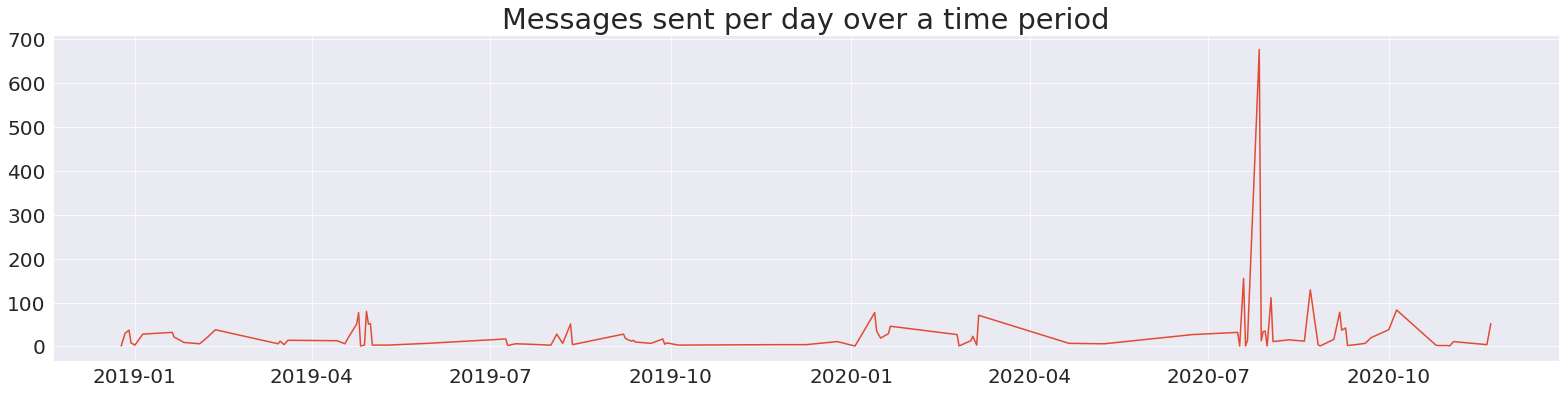

In [23]:
# Improving Default Styles using Seaborn
sns.set_style("darkgrid")

# For better readablity;
import matplotlib
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (27, 6)      # Same as `plt.figure(figsize = (27, 6))`

# A basic plot
plt.plot(df1.date, df1.message_count)
plt.title('Messages sent per day over a time period');

# Saving the plots
plt.savefig('msg_plots.svg', format = 'svg')

In [24]:
top10days = df1.sort_values(by="message_count", ascending=False).head(10)    # Sort values according to the number of messages per day.
top10days.reset_index(inplace=True)           # reset index in order.
top10days.drop(columns="index", inplace=True) # dropping original indices.
top10days

,date,message_count
0,2020-07-27,677
1,2020-07-19,155
2,2020-08-22,129
3,2020-08-02,111
4,2020-10-05,83
5,2019-04-29,80
6,2020-09-06,78
7,2020-01-13,77
8,2019-04-25,77
9,2020-03-06,71


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



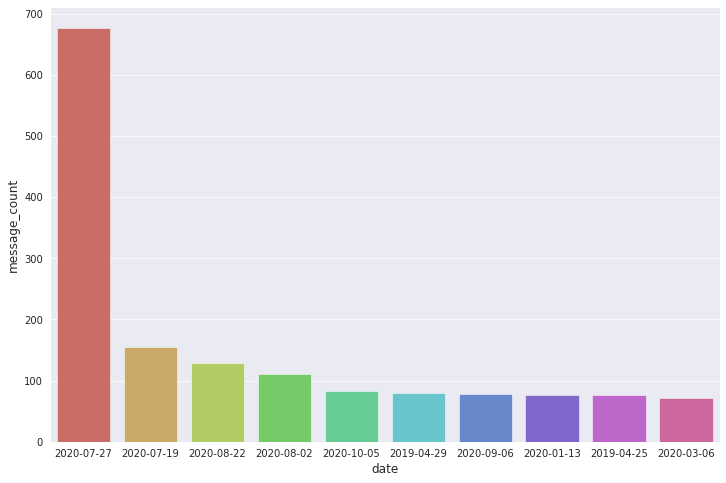

In [25]:
# Improving Default Styles using Seaborn
sns.set_style("darkgrid")

# For better readablity;
import matplotlib
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (12, 8)

# A bar plot for top 10 days
sns.barplot(top10days.date, top10days.message_count, palette="hls");

# Saving the plots
plt.savefig('top10_days.svg', format = 'svg')

In [26]:
df.Date = pd.DatetimeIndex(df.Time).time

df.Time

0       12:07 pm
1        8:18 am
2        8:44 am
3        9:56 am
4        2:16 pm
          ...   
2957     6:12 pm
2958    11:21 pm
2959    11:21 pm
2960    11:26 pm
2961    11:26 pm
Name: Time, Length: 2961, dtype: object

In [27]:
# count total message 
total_messages = df.shape[0]

# count media message
media_messages = df[df.Message == '<Media ommitted>'].shape[0]

# count links
urlPattern = r'(https?://\S+)'
links = df.Message.apply(lambda x: re.findall(urlPattern, x)).str.len().sum()

In [28]:
# count total message 
total_messages = df.shape[0]

# count media message
media_messages = df[df.Message == '<Media ommitted>'].shape[0]

# count links
urlPattern = r'(https?://\S+)'
links = df.Message.apply(lambda x: re.findall(urlPattern, x)).str.len().sum()

In [29]:
# create array of emojis used
emojis=[]
for string in df.Message:
    my_str = str(string)
    for each in my_str:
        if each in emoji.UNICODE_EMOJI:
            emojis.append(each)

In [30]:
# turn Array into dataframe
emoji_df = pd.DataFrame(emojis)
emoji_df = emoji_df[0].value_counts().head(10).reset_index()
emoji_df.columns = ['Emojis', 'Frenquency']
emoji_messages = emoji_df.Frenquency.sum()
emoji_df

,Emojis,Frenquency
0,🤣,128
1,😂,65
2,🎉,53
3,❤,31
4,🎊,20
5,🤭,16
6,😍,14
7,🥺,8
8,😔,8
9,😒,5


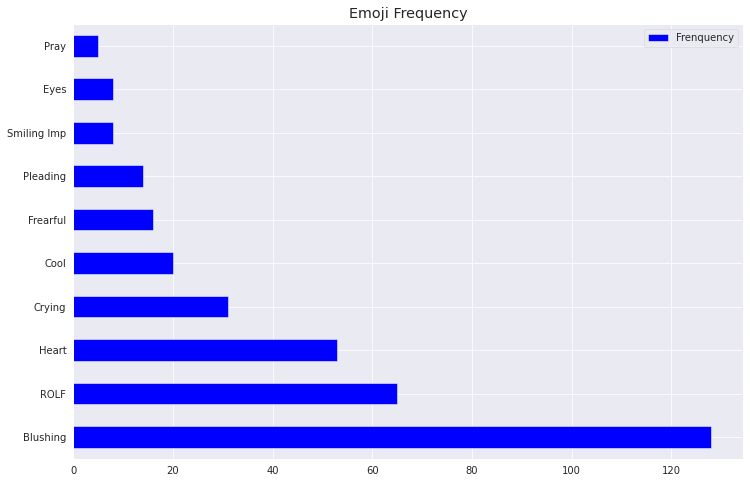

In [31]:
emoji_df.plot(kind='barh', color = 'blue', title='Emoji Frequency').set_yticklabels(
['Blushing', 'ROLF', 'Heart', 'Crying', 'Cool', 'Frearful', 'Pleading', 'Smiling Imp','Eyes', 'Pray']);

In [32]:
# print All Stats
print("Group: Osita")
print("Messages:", total_messages)
print("Media:", media_messages)
print("Emoji:", emoji_messages)

Group: Osita
Messages: 2961
Media: 0
Emoji: 348


In [35]:
# Count total message per user
dfMessages = df.User.value_counts().reset_index()
dfMessages.columns = ['User', 'Messages']

In [36]:
# Save nan-media from messages
dfNonMedia = df[df.Message.str.contains('<Media omitted>')]
df = df[~df.Message.str.contains('<Media omitted>')]

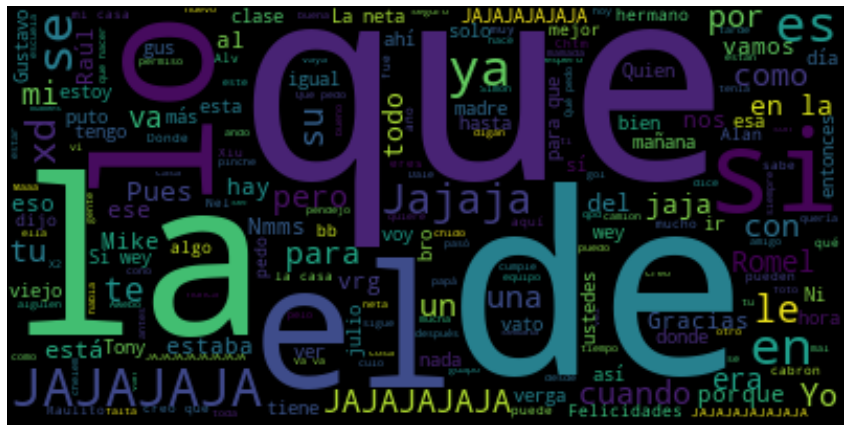

In [37]:
# Generate a word cloud image
text = " ".join(review for review in df["Message"])

wordcloud = WordCloud(random_state=1,stopwords = STOPWORDS).generate(text)

bar,ax = plt.subplots(figsize=(15,10))
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
#nltk librería de análisis de lenguaje
import nltk
#Este proceso puede hacerse antes de forma manual, descargar las stopwords de la librería nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_sp = set(stopwords.words('spanish'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


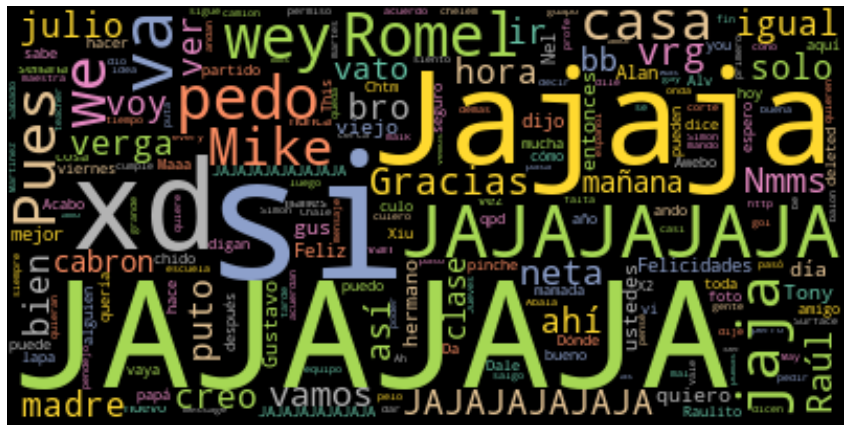

In [47]:
wordcloud = WordCloud(random_state=2,stopwords = stop_words_sp,colormap='Set2', collocations=False).generate(text)

bar,ax = plt.subplots(figsize=(15,10))
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



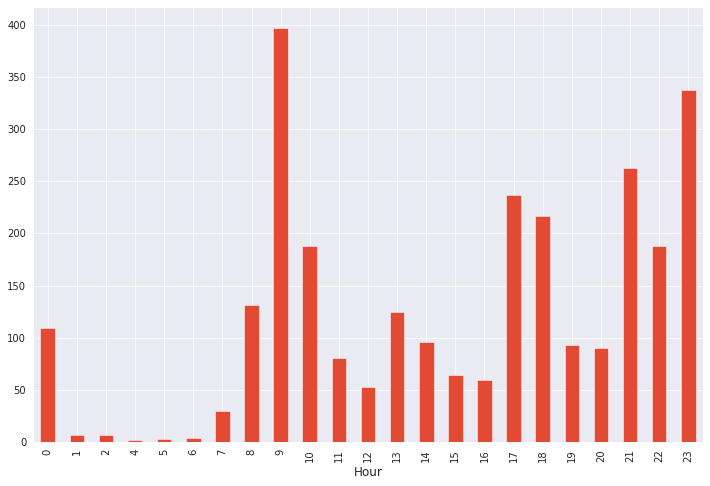

In [40]:
df['Hour'] = df['Date'].apply(lambda x: x.hour)
df.groupby(['Hour']).size().sort_index().plot(x="Hour", kind='bar')